In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

1. Generando los valores de X e y

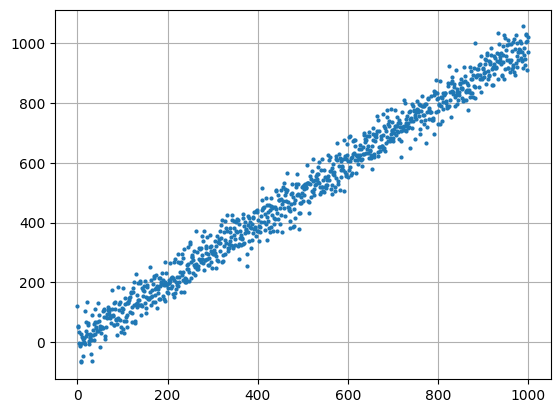

In [2]:
X = np.linspace(start=0, stop=1000, num=1000)
y = (X + 2) + np.random.normal(1,40, size=X.shape)

plt.plot(X, y, 'o', markersize=2)
plt.grid()
plt.show()

2. Diviendo el conjunto de datos en train y test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

4. Creando el modelo

In [4]:
entrada = keras.layers.Input(shape=(1,), name='capa_de_entrada')
capa_oculta_1 = keras.layers.Dense(200, activation='relu', name='capa_oculta_1')(entrada)
capa_oculta_2 = keras.layers.Dense(200, activation='relu', name='capa_oculta_2')(capa_oculta_1)
capa_oculta_3 = keras.layers.Dense(200, activation='relu', name='capa_oculta_3')(capa_oculta_2)
capa_oculta_4 = keras.layers.Dense(200, activation='relu', name='capa_oculta_4')(capa_oculta_3)
salida = keras.layers.Dense(1, activation='linear', name='capa_de_salida')(capa_oculta_4)

modelo = keras.Model(inputs=[entrada], outputs=[salida])

5. Compilación del modelo

In [5]:
modelo.compile(
    loss = 'mse',
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
)

6. Entrenamiento

In [6]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='modelos_guardados/modelo_lineal_con_ruido.h5',
    monitor='val_loss',
    verbose=-1,
    save_best_only=True,
    mode='min'
)

In [7]:
history = modelo.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/500
18/18 [==============================] - 1s 28ms/step - loss: 270715.2188 - val_loss: 176422.6562
Epoch 2/500
18/18 [==============================] - 0s 13ms/step - loss: 152130.3594 - val_loss: 84034.3594
Epoch 3/500
18/18 [==============================] - 0s 15ms/step - loss: 58189.1484 - val_loss: 18108.1348
Epoch 4/500
18/18 [==============================] - 0s 15ms/step - loss: 7664.5142 - val_loss: 1604.1914
Epoch 5/500
18/18 [==============================] - 0s 8ms/step - loss: 1969.3219 - val_loss: 2165.0903
Epoch 6/500
18/18 [==============================] - 0s 14ms/step - loss: 1639.9403 - val_loss: 1593.2317
Epoch 7/500
18/18 [==============================] - 0s 8ms/step - loss: 1521.3552 - val_loss: 1599.4553
Epoch 8/500
18/18 [==============================] - 0s 12ms/step - loss: 1511.7318 - val_loss: 1614.8589
Epoch 9/500
18/18 [==============================] - 0s 12ms/step - loss: 1512.9971 - val_loss: 1610.6549
Epoch 10/500
18/18 [===================

7. Se carga el modelo entrenado

In [8]:
modelo = keras.models.load_model('modelos_guardados/modelo_lineal_con_ruido.h5')

8. Evaluación del modelo

In [9]:
modelo.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1647.0983


1647.0982666015625

9. Realizando predicciones

In [10]:
y_pred = modelo.predict(X_test)

10/10 [==============================] - 0s 2ms/step


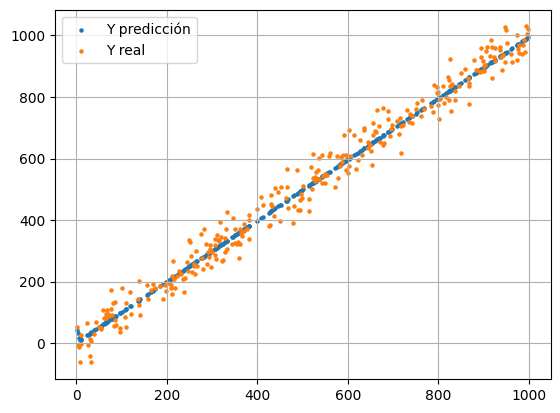

In [11]:
#X_test_inv = escalador.inverse_transform(X_test)

plt.scatter(X_test, y_pred, s=5, label='Y predicción')
plt.scatter(X_test, y_test, s=5, label = 'Y real')
plt.legend()
plt.grid()
plt.show()

10. Verificando el coeficiente de determinación

In [12]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.9811950153360096